<a href="https://colab.research.google.com/github/BhanuN123/ObjectDetection-using-Yolo/blob/main/dil_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLO
model=YOLO("yolov8n.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 97.5MB/s]


In [ ]:

import torch
import torch.nn as nn

class DilatedBackbone(nn.Module):
    def __init__(self):
        super().__init__()
        self.modified_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=4, dilation=4),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=2, dilation=2),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1, dilation=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.modified_layers(x)


In [ ]:
model.model.backbone = DilatedBackbone()
print(model.model)

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    

In [ ]:
!unzip '/content/drive/MyDrive/dataset/dataset_split.zip' -d '/content/data/'

Archive:  /content/drive/MyDrive/dataset/dataset_split.zip
   creating: /content/data/dataset_split/
  inflating: /content/data/dataset_split/data.yaml  
   creating: /content/data/dataset_split/train/
   creating: /content/data/dataset_split/train/images/
  inflating: /content/data/dataset_split/train/images/1 (1).jpg  
  inflating: /content/data/dataset_split/train/images/1 (3).jpg  
  inflating: /content/data/dataset_split/train/images/1 (4).jpg  
  inflating: /content/data/dataset_split/train/images/1 (5).jpg  
  inflating: /content/data/dataset_split/train/images/1634016299438.jpg  
  inflating: /content/data/dataset_split/train/images/1634016299451.jpg  
  inflating: /content/data/dataset_split/train/images/1634016299471.jpg  
  inflating: /content/data/dataset_split/train/images/1634016299516.jpg  
  inflating: /content/data/dataset_split/train/images/1634016299526.jpg  
  inflating: /content/data/dataset_split/train/images/1634016299534.jpg  
  inflating: /content/data/dataset_

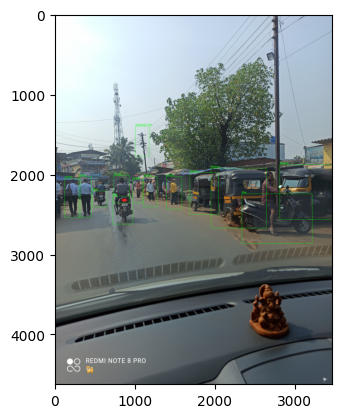

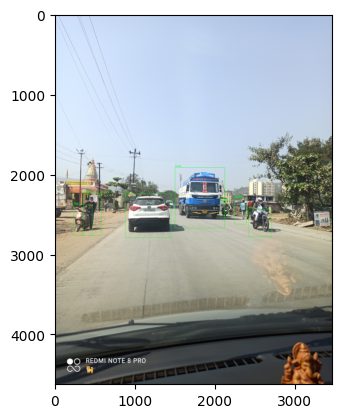

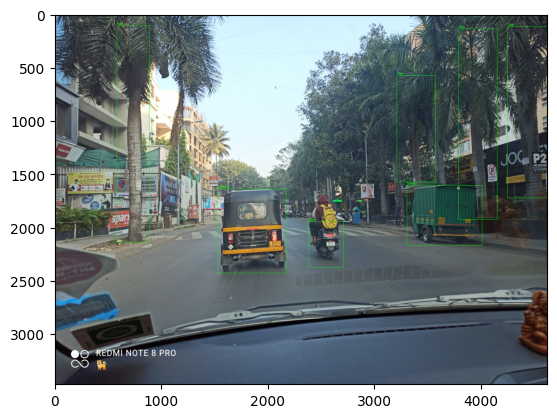

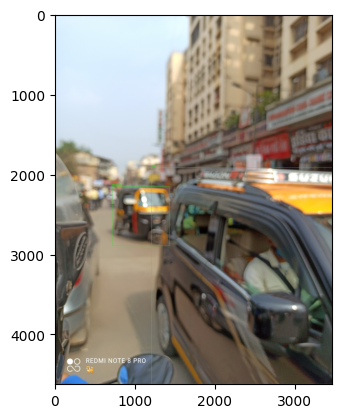

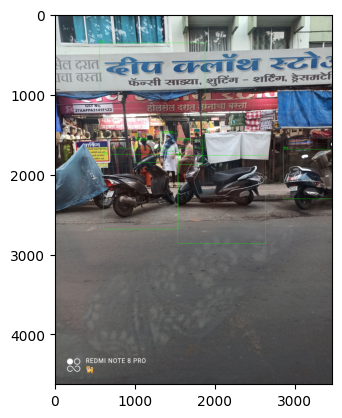

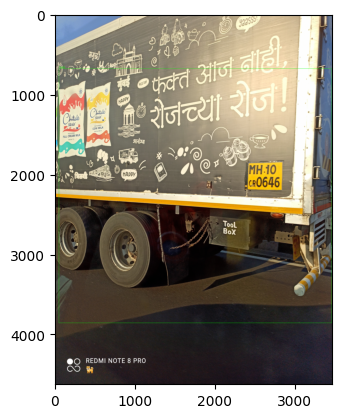

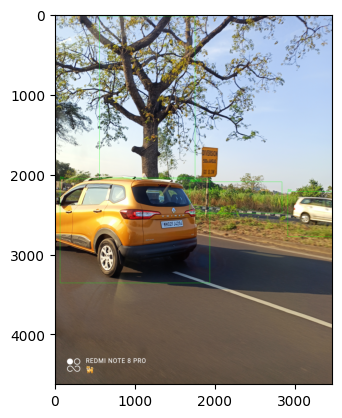

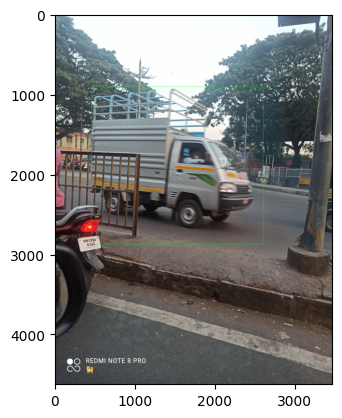

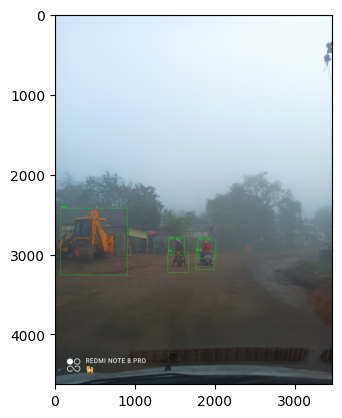

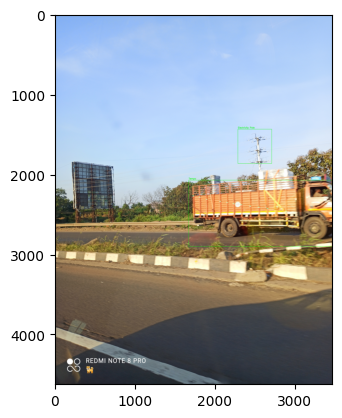

In [ ]:
import os
import cv2
import yaml
import matplotlib.pyplot as plt

with open('/content/data/dataset_split/data.yaml', 'r') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

image_folder = '/content/data/dataset_split/train/images'
annotation_folder = '/content/data/dataset_split/train/labels'

class_names = config['names']

def load_annotations(image_paths):
    annotations = []
    for image_path in image_paths:
        image_filename = os.path.basename(image_path)
        annotation_file = os.path.join(annotation_folder, os.path.splitext(image_filename)[0] + '.txt')  # Annotation path
        boxes = []

        img = cv2.imread(image_path)
        if img is not None:
            img_height, img_width, _ = img.shape
        else:
            print(f"Error reading image {image_path}")
            continue

        if os.path.exists(annotation_file):
            with open(annotation_file, 'r') as f:
                for line in f.readlines():
                    parts = line.strip().split()
                    class_id = int(parts[0])
                    x_center, y_center, width, height = map(float, parts[1:])

                    x1 = int((x_center - width / 2) * img_width)
                    y1 = int((y_center - height / 2) * img_height)
                    x2 = int((x_center + width / 2) * img_width)
                    y2 = int((y_center + height / 2) * img_height)
                    boxes.append((x1, y1, x2, y2, class_id))
        annotations.append(boxes)
    return annotations

def visualize_annotations(image_paths, annotations):
    for image_path, boxes in zip(image_paths, annotations):
        img = cv2.imread(image_path)
        if len(boxes) == 0:
            print(f"No annotations for {image_path}")
        for box in boxes:
            x1, y1, x2, y2, class_id = box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = class_names[class_id]
            cv2.putText(img, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.show()

image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg')]

annotations = load_annotations(image_paths)
visualize_annotations(image_paths[:10], annotations[:10])


In [ ]:

model.train(data="/content/data/dataset_split/data.yaml", epochs=10, batch=16, imgsz=640, device='0')


Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data/dataset_split/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 19.6MB/s]


Overriding model.yaml nc=80 with nc=35

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 95.8MB/s]


AMP: checks passed ✅


train: Scanning /content/data/dataset_split/train/labels... 1608 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1608/1608 [00:04<00:00, 333.99it/s]

train: New cache created: /content/data/dataset_split/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/data/dataset_split/val/labels... 401 images, 0 backgrounds, 0 corrupt: 100%|██████████| 401/401 [00:00<00:00, 425.69it/s]

val: New cache created: /content/data/dataset_split/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000256, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.28G      1.947      4.307       1.48         49        640: 100%|██████████| 101/101 [04:54<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:03<00:00,  4.89s/it]


                   all        401       2213      0.829     0.0299     0.0497     0.0261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.22G      1.824      3.177      1.403         53        640: 100%|██████████| 101/101 [04:29<00:00,  2.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:08<00:00,  5.30s/it]


                   all        401       2213      0.656      0.113     0.0761     0.0382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.22G      1.776      2.835      1.386         30        640: 100%|██████████| 101/101 [04:24<00:00,  2.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:09<00:00,  5.33s/it]


                   all        401       2213      0.611      0.156      0.104     0.0534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.22G      1.735      2.653       1.36         47        640: 100%|██████████| 101/101 [04:04<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:03<00:00,  4.91s/it]


                   all        401       2213      0.523      0.155      0.117      0.062

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.23G      1.709      2.553      1.355         28        640: 100%|██████████| 101/101 [04:21<00:00,  2.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:07<00:00,  5.16s/it]


                   all        401       2213      0.517       0.18      0.135     0.0724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.21G      1.683       2.43       1.32         56        640: 100%|██████████| 101/101 [04:23<00:00,  2.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:08<00:00,  5.25s/it]


                   all        401       2213      0.559      0.148       0.14      0.075

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.24G       1.65      2.369      1.313         32        640: 100%|██████████| 101/101 [04:17<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:07<00:00,  5.20s/it]

                   all        401       2213       0.45      0.199      0.156     0.0828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.23G      1.642      2.319      1.303         42        640: 100%|██████████| 101/101 [04:29<00:00,  2.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:08<00:00,  5.24s/it]


                   all        401       2213      0.525      0.192      0.168     0.0882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.23G      1.621      2.254      1.288         30        640: 100%|██████████| 101/101 [04:32<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:08<00:00,  5.26s/it]


                   all        401       2213      0.482      0.214      0.171     0.0909

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.23G       1.61      2.236      1.286         42        640: 100%|██████████| 101/101 [04:19<00:00,  2.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:04<00:00,  4.94s/it]


                   all        401       2213      0.486      0.213      0.177      0.094

10 epochs completed in 0.935 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,012,473 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:12<00:00,  5.60s/it]


                   all        401       2213      0.483      0.214      0.177     0.0941
        Traffic Signal        133        231      0.372      0.481       0.35      0.167
             Lamp Post         84        156       0.15      0.122     0.0855     0.0296
        Zebra Crossing         38         64      0.312      0.125      0.185      0.123
                  Bike        211        476      0.646      0.758      0.739      0.333
                   Car        171        305      0.438      0.784      0.631       0.38
               Rikshaw         98        148       0.48      0.622      0.478      0.304
            Tyre Works         17         26     0.0987      0.192     0.0598     0.0277
                  Tree         63         91      0.252      0.319      0.236      0.124
               Tractor          7         11          1          0      0.017    0.00446
                Cattle          6          9      0.227      0.556      0.388      0.119
            Vegetatio

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d9fec6bd150>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0

In [ ]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>